In [94]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import savefig
from scipy import stats
import scikit_posthocs as sp

In [62]:
pal = sns.color_palette('crest')
pal.as_hex()[:]

['#7dba91', '#59a590', '#40908e', '#287a8c', '#1c6488', '#254b7f']

# Wire Mesh Data

In [42]:
wm_2023 = pd.read_csv('../../2023/Data/2023_wire_mesh_clean.csv')
wm_2023['total_phorids'] = wm_2023['total_phorid_maggots'] + wm_2023['total_phorid_pupae']
wm_2023 = wm_2023.rename(columns={'total_scm_maggots':'scm_larvae_sum', 'record_id':'field_id',
       'total_scm_pupae':'scm_pupae_sum', 'number_wireworm':'wireworms'}).drop(['id', 'container_number', 'project', 'total_phorid_maggots', 'total_phorid_pupae', 'other_seeds'], axis=1)
wm_2023['total_scm'] = wm_2023['scm_larvae_sum'] + wm_2023['scm_pupae_sum']
wm_2023

,number_seeds,scm_larvae_sum,collection_date,field_id,seed_type,scm_pupae_sum,wireworms,scm_seeds,total_phorids,total_scm
0,10.0,0,4/18/23,POV_DUN,Corn,0,1,0,0,0
1,11.0,1,4/18/23,POV_DUN,Bean,0,2,1,10,1
2,5.0,0,4/18/23,DIP_CUR,Bean,17,0,0,0,17
3,9.0,0,4/18/23,DIP_CUR,Corn,0,2,0,0,0
4,10.0,0,4/18/23,DIP_PAT,Corn,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
277,10.0,0,6/12/23,SMI_KEL,Corn,0,0,0,0,0
278,NaN,2,6/13/23,SMI_JOH_2,Bean,0,0,0,0,2
279,10.0,0,6/13/23,SMI_JOH_2,Corn,0,0,0,0,0
280,10.0,0,6/12/23,SMI_HOL,Bean,0,0,0,0,0


In [43]:
wm_2024 = pd.read_csv('..//Data/2024_wire_mesh_clean.csv')
wm_2024

,field_id,collection_date,total_scm,number_seeds,scm_seeds,seed_type,wireworms,total_phorids,scm_larvae_sum,scm_pupae_sum
0,DEG_DIE_HILL,4/15/24,0,10,0,lima,0,0.0,0,0
1,DEG_DIE_HILL,4/15/24,0,10,0,corn,0,0.0,0,0
2,DEG_DIE_HILL,4/15/24,0,10,0,soy,0,0.0,0,0
3,DEG_DIE_HILL,4/29/24,0,10,0,corn,0,0.0,0,0
4,DEG_DIE_HILL,4/15/24,0,10,0,lima,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
614,ZUE_REE,5/21/24,0,10,0,soy,0,0.0,0,0
615,ZUE_REE,5/21/24,0,9,0,soy,0,0.0,0,0
616,ZUE_REE,5/21/24,0,9,0,lima,0,0.0,0,0
617,ZUE_REE,5/21/24,0,10,0,corn,0,0.0,0,0


In [78]:
wm = pd.concat([wm_2023, wm_2024], axis=0)
wm['seed_type'] = wm['seed_type'].str.lower()
wm['seed_type'] = wm['seed_type'].replace('bean', 'lima')
wm['seed_type'] = wm['seed_type'].str.capitalize()
wm['prop_seeds'] = wm['scm_seeds'] / wm['number_seeds']
wm

,number_seeds,scm_larvae_sum,collection_date,field_id,seed_type,scm_pupae_sum,wireworms,scm_seeds,total_phorids,total_scm,prop_seeds
0,10.0,0,4/18/23,POV_DUN,Corn,0,1,0,0.0,0,0.000000
1,11.0,1,4/18/23,POV_DUN,Lima,0,2,1,10.0,1,0.090909
2,5.0,0,4/18/23,DIP_CUR,Lima,17,0,0,0.0,17,0.000000
3,9.0,0,4/18/23,DIP_CUR,Corn,0,2,0,0.0,0,0.000000
4,10.0,0,4/18/23,DIP_PAT,Corn,0,0,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
614,10.0,0,5/21/24,ZUE_REE,Soy,0,0,0,0.0,0,0.000000
615,9.0,0,5/21/24,ZUE_REE,Soy,0,0,0,0.0,0,0.000000
616,9.0,0,5/21/24,ZUE_REE,Lima,0,0,0,0.0,0,0.000000
617,10.0,0,5/21/24,ZUE_REE,Corn,0,0,0,0.0,0,0.000000


/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


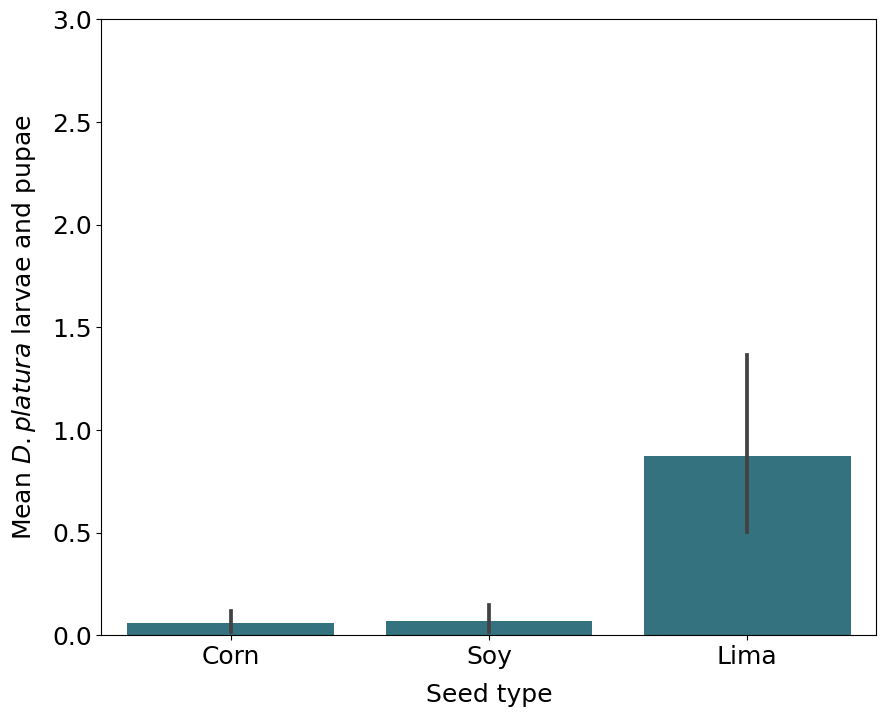

In [82]:
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.style.use('default')
plt.figure(figsize=(10,8))

plt.rcParams.update({'font.size': 18})

sns.barplot(
    data=wm, x="seed_type", y="total_scm",color="#287a8c",
    order=['Corn', 'Soy', 'Lima']
)

plt.xlabel('Seed type', labelpad=10)
plt.ylabel('Mean $\it{D. platura}$ larvae and pupae', labelpad=10)
plt.ylim(0, 3)
#plt.title('$\it{D. platura}$ larvae in traps')
#plt.savefig('Figures/cover_crop.png')
plt.show()


In [87]:
wm.groupby('seed_type').mean('total_scm')

,number_seeds,scm_larvae_sum,scm_pupae_sum,wireworms,scm_seeds,total_phorids,total_scm,prop_seeds
seed_type,,,,,,,,
Corn,9.470588,0.050420,0.008403,0.061625,0.022409,0.086835,0.058824,0.002298
Lima,8.852853,0.476471,0.397059,0.211765,0.129412,5.488235,0.873529,0.016363
Soy,9.308824,0.053922,0.014706,0.029412,0.029412,0.137931,0.068627,0.003392


In [89]:
group1 = wm.loc[wm['seed_type'] == 'Corn']['total_scm']
group2 = wm.loc[wm['seed_type'] == 'Soy']['total_scm']
group3 = wm.loc[wm['seed_type'] == 'Lima']['total_scm']
statistic, p_value = stats.kruskal(group1, group2, group3)
print("Kruskal-Wallis H statistic:", statistic)
print("P-value:", p_value)

Kruskal-Wallis H statistic: 63.85777549840065
P-value: 1.3597536623493051e-14


In [100]:
data = [group1, group2, group3]
p_values = sp.posthoc_dunn(data, p_adjust='holm')

print(p_values)

              1             2             3
1  1.000000e+00  8.065956e-01  6.058532e-13
2  8.065956e-01  1.000000e+00  3.001428e-09
3  6.058532e-13  3.001428e-09  1.000000e+00


/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


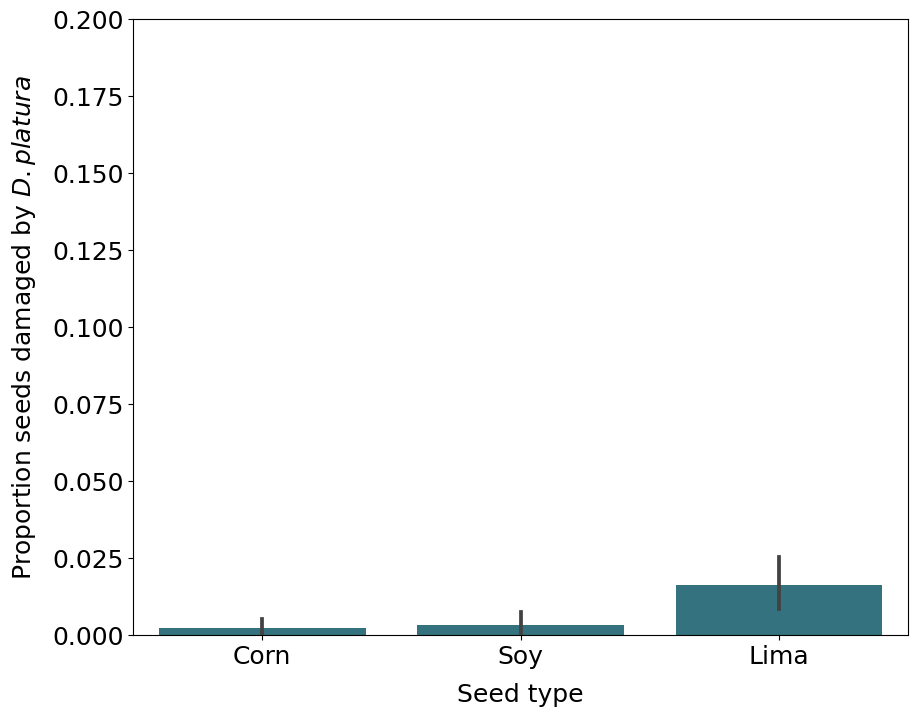

In [81]:
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.style.use('default')
plt.figure(figsize=(10,8))

plt.rcParams.update({'font.size': 18})

sns.barplot(
    data=wm, x="seed_type", y="prop_seeds",color="#287a8c",
    order=['Corn', 'Soy', 'Lima']
)

plt.xlabel('Seed type', labelpad=10)
plt.ylabel('Proportion seeds damaged by $\it{D. platura}$', labelpad=10)
plt.ylim(0, 0.2)
#plt.title('$\it{D. platura}$ larvae in traps')
#plt.savefig('Figures/cover_crop.png')
plt.show()

In [114]:
group1 = wm.loc[wm['seed_type'] == 'Corn']['prop_seeds'].dropna()
group2 = wm.loc[wm['seed_type'] == 'Soy']['prop_seeds'].dropna()
group3 = wm.loc[wm['seed_type'] == 'Lima']['prop_seeds'].dropna()
statistic, p_value = stats.kruskal(group1, group2, group3)
print("Kruskal-Wallis H statistic:", statistic)
print("P-value:", p_value)

Kruskal-Wallis H statistic: 26.27496269958437
P-value: 1.9699914609002246e-06


In [115]:
data = [group1, group2, group3]
p_values = sp.posthoc_dunn(data, p_adjust='holm')

print(p_values)

          1         2         3
1  1.000000  0.610519  0.000004
2  0.610519  1.000000  0.000561
3  0.000004  0.000561  1.000000


# Sticky Card Data

In [166]:
sc_2023 = pd.read_csv('../../2023/Data/2023_scm_counts.csv')
sc_2023 = clean_columns(sc_2023)
sc_2023["date"] = pd.to_datetime(sc_2023["date"], format="%m/%d/%y")
sc_2023[['n_scm_i_m', 'n_scm_i_f', 'n_scm_o_m', 'n_scm_o_f', 'n_d_florilega_i', 'n_d_florilega_o']] = sc_2023[['n_scm_i_m', 'n_scm_i_f', 'n_scm_o_m', 'n_scm_o_f', 'n_d_florilega_i', 'n_d_florilega_o']].apply(pd.to_numeric, errors='coerce')
sc_2023

,card_id,data_collector,site,date,n_scm_i_m,n_scm_i_f,n_scm_o_m,n_scm_o_f,n_d_florilega_i,n_d_florilega_o,initials,notes
0,6376,Shea Crowther,CUR_FIE_IN,2023-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,6390,Shea Crowther,CUR_FIE_IN,2023-07-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,6404,Shea Crowther,CUR_FIE_IN,2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,6502,Shea Crowther,CUR_FIE_IN,2023-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,6518,Shea Crowther,CUR_FIE_IN,2023-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...
2375,7313,Marion Zuefle,ZUE_REE,2023-10-24,NaN,NaN,NaN,NaN,NaN,NaN,,
2376,7395,Marion Zuefle,ZUE_REE,2023-10-31,NaN,NaN,NaN,NaN,NaN,NaN,,
2377,7396,Marion Zuefle,ZUE_REE,2023-10-31,5.0,6.0,7.0,6.0,2.0,0.0,EW,
2378,7397,Marion Zuefle,ZUE_REE,2023-11-06,NaN,NaN,NaN,NaN,NaN,NaN,,


In [167]:
overwintering_sites = [
    "EVE_ORC_IN",
    "EVE_ORC_OUT",
    "EVE_FIE_IN",
    "EVE_FIE_OUT",
    "EVE_FOR_IN",
    "EVE_FOR_OUT",
    "KIR_FOR_IN",
    "KIR_FOR_OUT",
    "KIR_ORC_IN",
    "KIR_ORC_OUT",
    'KIR_FIE_IN',
    'KIR_FIE_OUT',
    'GRS_FIE_IN',
    'GRS_FIE_OUT',
    'GRS_ORC_OUT',
    'GRS_ORC_IN',
    'GRN_FIE_IN',
    'GRN_FIE_OUT',
    'GRN_ORC_OUT',
    'GRN_ORC_IN',
    'DUN_FIE_IN',
    'DUN_FOR_IN',
    'DUN_FOR_OUT',
    'IND_ORC_IN',
    'IND_ORC_OUT',
    'IND_ORC_IN_2',
    'IND_ORC_OUT_2',
    'OLE_FOR_OUT',
    'OLE_FOR_IN',
    'OLE_FIE_OUT',
    'OLE_FIE_IN',
    'CUR_FIE_IN',
    'FLE_FIE_IN', 
    'FLE_FOR_IN',
    'FLE_FOR_OUT',
    'PAT_FIE_IN'
]

In [168]:
# Drop overwintering only site names. 

sc_2023 = sc_2023[~sc_2023['site'].isin(overwintering_sites)]
sc_2023['total_scm'] = sc_2023['n_scm_i_m'] + sc_2023['n_scm_o_m'] + sc_2023['n_scm_i_f'] + sc_2023['n_scm_o_f']
sc_2023 = sc_2023.drop(['initials', 'notes'], axis=1)
sc_2023

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_47967/1997601076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_2023['total_scm'] = sc_2023['n_scm_i_m'] + sc_2023['n_scm_o_m'] + sc_2023['n_scm_i_f'] + sc_2023['n_scm_o_f']


,card_id,data_collector,site,date,n_scm_i_m,n_scm_i_f,n_scm_o_m,n_scm_o_f,n_d_florilega_i,n_d_florilega_o,total_scm
18,2245,Janice Degni,DEG_DIE_HILL,2023-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2246,Janice Degni,DEG_DIE_HILL,2023-04-21,16.0,10.0,7.0,5.0,0.0,0.0,38.0
20,2265,Janice Degni,DEG_DIE_HILL,2023-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,2266,Janice Degni,DEG_DIE_HILL,2023-04-27,43.0,9.0,51.0,12.0,0.0,0.0,115.0
22,2373,Janice Degni,DEG_DIE_HILL,2023-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2375,7313,Marion Zuefle,ZUE_REE,2023-10-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2376,7395,Marion Zuefle,ZUE_REE,2023-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2377,7396,Marion Zuefle,ZUE_REE,2023-10-31,5.0,6.0,7.0,6.0,2.0,0.0,24.0
2378,7397,Marion Zuefle,ZUE_REE,2023-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
sc_2024 = pd.read_csv('../Data/2024_scm_counts.csv')
sc_2024 = clean_columns(sc_2024)
sc_2024["date_collected"] = pd.to_datetime(sc_2024["date_collected"], format="%m/%d/%y")
sc_2024[['n_scm_m_1', 'n_scm_m_2', 'n_scm_f_1', 'n_scm_f_2', 'n_d_florilega_1', 'n_d_florilega_2']] = sc_2024[['n_scm_m_1', 'n_scm_m_2', 'n_scm_f_1', 'n_scm_f_2', 'n_d_florilega_1', 'n_d_florilega_2']].apply(pd.to_numeric, errors='coerce')
sc_2024

,card_id,data_collector,field_id,date_placed,date_collected,n_scm_m_1,n_scm_m_2,n_scm_f_1,n_scm_f_2,n_d_florilega_1,n_d_florilega_2,initials
0,24_1001,Aaron Gabriel,GAB_STE,3/1/24,2024-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24_1002,Aaron Gabriel,GAB_STE,3/1/24,2024-03-08,0.0,0.0,0.0,0.0,0.0,0.0,SN
2,24_1003,Aaron Gabriel,GAB_ALL,2/29/24,2024-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24_1004,Aaron Gabriel,GAB_ALL,2/29/24,2024-03-08,1.0,0.0,0.0,0.0,0.0,0.0,AS
4,24_1005,Aaron Gabriel,GAB_HEN,3/8/24,2024-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2003,24_3004,Shea Crowther,DIP_FLE,11/26/24,2024-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,24_3005,Shea Crowther,DIP_CUR,11/26/24,2024-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,24_3006,Shea Crowther,DIP_CUR,11/26/24,2024-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,24_3007,Shea Crowther,POV_DUN,11/26/24,2024-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
# Drop overwintering only site names. 

sc_2024 = sc_2024[~sc_2024['field_id'].isin(overwintering_sites)]
sc_2024['total_scm'] = sc_2024['n_scm_m_1'] + sc_2024['n_scm_m_2'] + sc_2024['n_scm_f_1'] + sc_2024['n_scm_f_2']
sc_2024 = sc_2024.drop(['initials', 'date_placed'], axis=1)
sc_2024

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_47967/3289427902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_2024['total_scm'] = sc_2024['n_scm_m_1'] + sc_2024['n_scm_m_2'] + sc_2024['n_scm_f_1'] + sc_2024['n_scm_f_2']


,card_id,data_collector,field_id,date_collected,n_scm_m_1,n_scm_m_2,n_scm_f_1,n_scm_f_2,n_d_florilega_1,n_d_florilega_2,total_scm
0,24_1001,Aaron Gabriel,GAB_STE,2024-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24_1002,Aaron Gabriel,GAB_STE,2024-03-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24_1003,Aaron Gabriel,GAB_ALL,2024-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24_1004,Aaron Gabriel,GAB_ALL,2024-03-08,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,24_1005,Aaron Gabriel,GAB_HEN,2024-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2003,24_3004,Shea Crowther,DIP_FLE,2024-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,24_3005,Shea Crowther,DIP_CUR,2024-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,24_3006,Shea Crowther,DIP_CUR,2024-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,24_3007,Shea Crowther,POV_DUN,2024-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
sc_2023 = sc_2023.rename(columns={'site':'field_id', 'date':'date_collected', 'n_scm_i_m':'n_scm_m_1', 'n_scm_i_f':'n_scm_f_1',
       'n_scm_o_m':'n_scm_m_2', 'n_scm_o_f':'n_scm_f_2', 'n_d_florilega_i':'n_d_florilega_1', 'n_d_florilega_o':'n_d_florilega_2'})

In [178]:
sc = pd.concat([sc_2023, sc_2024], axis=0).dropna()
sc

,card_id,data_collector,field_id,date_collected,n_scm_m_1,n_scm_f_1,n_scm_m_2,n_scm_f_2,n_d_florilega_1,n_d_florilega_2,total_scm
19,2246,Janice Degni,DEG_DIE_HILL,2023-04-21,16.0,10.0,7.0,5.0,0.0,0.0,38.0
21,2266,Janice Degni,DEG_DIE_HILL,2023-04-27,43.0,9.0,51.0,12.0,0.0,0.0,115.0
23,2374,Janice Degni,DEG_DIE_HILL,2023-05-04,40.0,20.0,136.0,128.0,9.0,44.0,324.0
25,2560,Janice Degni,DEG_DIE_HILL,2023-05-11,80.0,18.0,36.0,15.0,3.0,0.0,149.0
27,2558,Janice Degni,DEG_DIE_HILL,2023-05-18,21.0,0.0,4.0,3.0,0.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...
1957,24_2958,Shea Crowther,POV_DUN,2024-10-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1959,24_2960,Shea Crowther,DIP_PAT,2024-10-08,1.0,1.0,1.0,0.0,0.0,1.0,3.0
1961,24_2962,Shea Crowther,DIP_FLE,2024-10-08,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1963,24_2964,Shea Crowther,DIP_CUR,2024-10-08,0.0,5.0,0.0,2.0,2.0,3.0,7.0


# Landscape